## Solution Titanic Challenge 
#### from Kaggle: Titanic: Machine Learning from Disaster

## 1. Import csv

_imports_ from train and test databases

In [115]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# show first 5 rows from train

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
# show first 5 rows from test

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Understand initial infos from data

In [117]:
# show how many rows and column from train

train.shape

(891, 12)

In [118]:
# show how many rows and column from test

test.shape

(418, 11)

In [119]:
# print information about all columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [120]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [121]:
# print from missing values detected

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Categorical features** 

Survived: 1 = survived, 0 = dead    
Sex: male, female     
Embarked: C = Cherbourg, Q = Queenstown, S = Southampton    

**Ordinal**

Pclass: 1st = Upper, 2nd = Middle, 3rd = Lower

**Numerical**

Age    
SibSp    
Parch   
Fare   

**Mixed data types**

*Numeric and alphanumeric*

Ticket     
Cabin

**Blank, null or empty values**

Age, Cabin, Embarked (train dataset)

In [123]:
# Use describe to print percentiles, standard deviation, mean and count

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [124]:
# Check categorical datas and how unique is

train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Carter, Rev. Ernest Courtenay",male,CA. 2343,G6,S
freq,1,577,7,4,644


Observation (#1): _Ticket_ and _Cabin_ are alphanumeric and there are some of them. Its difficult to see relation with so differents values, and its difficult to 'correcting' data for numbers. So, drop this column could be a good ideia.

## 3. Import python lib for visualization

In [125]:
import numpy as np

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#set seaborn default for plots 
sns.set()

In [127]:
# Create a function to plot the relationship of survivors and other information such as gender and class

def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

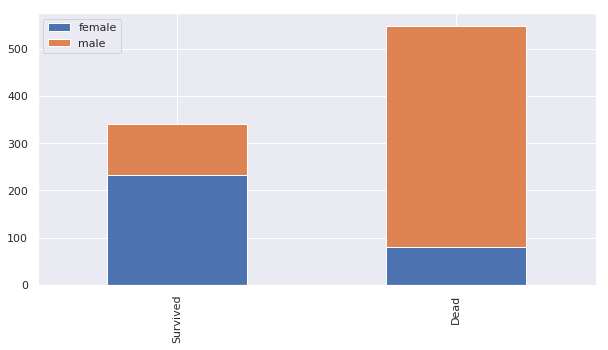

In [128]:
bar_chart('Sex')

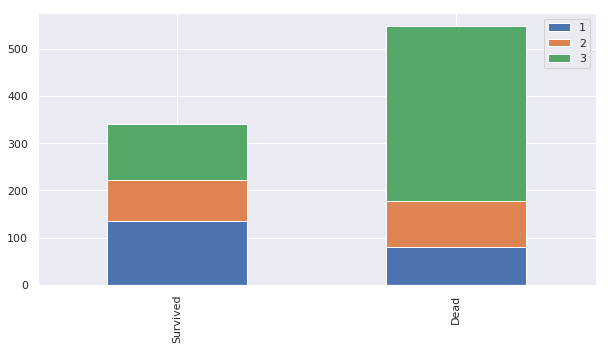

In [129]:
bar_chart('Pclass')

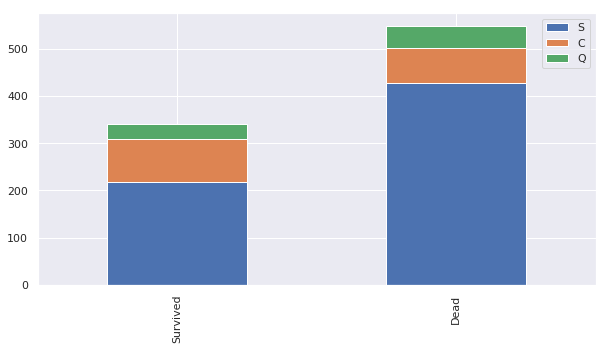

In [130]:
bar_chart('Embarked')

#### Some assumtions based on data analysis

* Sex is related with survivors, most of survivors are woman
* Class is related too, have more survivors from first class 

Its necessary fix database and change some categorical datas from number, like **Embarked** and **Sex**.

In [131]:
# Here we have significant correlation > .5, with class and survived

train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [132]:
# Here we have significant correlation > .5, with sex and survived

train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [133]:
# Here we have significant correlation > .5 with sibling or spouse and survived

train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [134]:
# Here we have significant correlation > .5 with parent or child and survived

train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [135]:
combine = [train,test] # combine train and test dataset

for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(' ([a-zA-Z]+)\.', expand=False)

In [136]:
# Print some treatments 

train['Title'].value_counts()
# print("-"*40)
# pd.crosstab(train['Title'], train['Sex'])

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Don           1
Countess      1
Jonkheer      1
Lady          1
Sir           1
Capt          1
Ms            1
Name: Title, dtype: int64

In [137]:
# Print some treatments and how many survived

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


## 4. Analyze by visualizing data

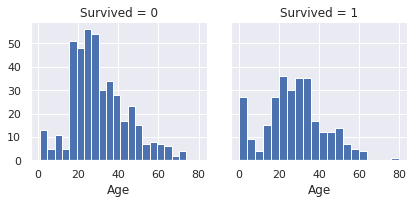

In [138]:
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(plt.hist, 'Age', bins=20)

**Observations**:

- Oldest passengers survived (Age = 80)
- Children > 4 y.o had high survival rate
- Most passengers are 17-32 not survived

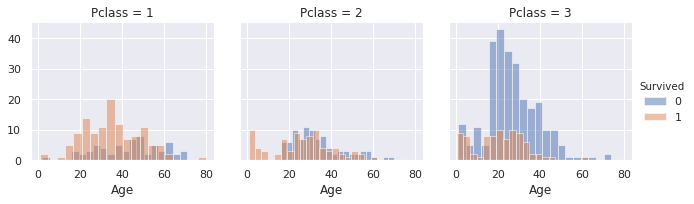

In [139]:
grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations**:

- Most passengers from First class survived
- Most passengers from Third class did not survive
- Most children survived

/home/naiara/GIT/Titanic/myenv/lib/python3.5/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


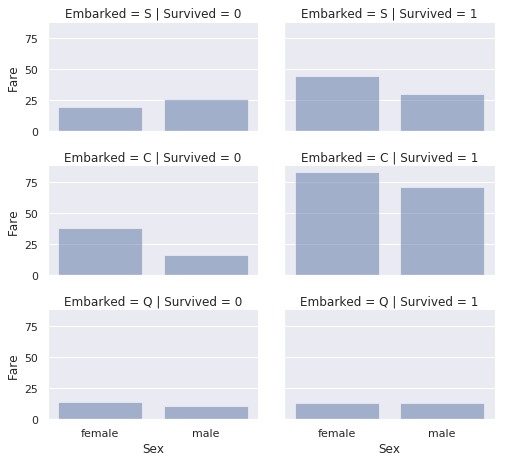

In [140]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

**Observations**:

- Most of passengers who embarked from C survived
- Woman who embarked from S had more chance to had survived

## 5. Correcting data

In [141]:
# With observation #3 we'll drop columns Ticket and Cabin

train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

combine = [train, test]

"Updated:", combine[0].shape, combine[1].shape

('Updated:', (891, 11), (418, 10))

In [142]:
# Check dropped columns

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.45,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Mr


In [143]:
# Its possiblel to can see a lot of Titles and to facilitate we'll join titles in a few groups
# Master, Miss, Mrs, Mr e Others or Rare

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [144]:
# To analysis we will group by similar titles and group others together

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr',\
                                                 'Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


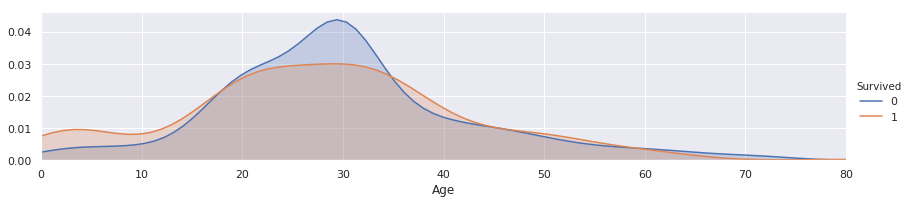

In [145]:
# Fill missing age with median age for each title

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)


facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, "Age", shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
# plt.xlim(30,40)
plt.show()

In [146]:
# Convert categorical feature to numeric

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [147]:
# Drop columns Name and PassengerID, now we have title

train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape


((891, 9), (418, 9))

Converting numerical Age to categorical variable    

- child: 0    
- young: 1
- aduld: 2
- mid-age: 3
- senior: 4

In [148]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,S,1
1,1,1,female,3.0,1,0,71.2833,C,3
2,1,3,female,1.0,0,0,7.9250,S,2
3,1,1,female,2.0,1,0,53.1000,S,3
4,0,3,male,2.0,0,0,8.0500,S,1


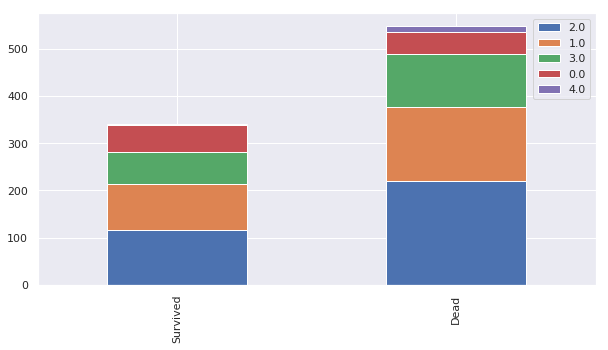

In [149]:
# Plot visualization from relation age and survivors

bar_chart('Age')

In [150]:
# Convert categorical sex for numeric

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,3.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [151]:
# Family Size is a new column to join Siblings, Spouses, Parents and Children
# and how size family had high ratio survive

for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [152]:
# facet = sns.FacetGrid(train, hue="Survived", aspect=4)
# facet.map(sns.kdeplot, 'FamilySize', shade=True)
# facet.set(xlim=(0,train['FamilySize'].max()))
# facet.add_legend()
# plt.xlim(0)

In [153]:
# IsAlone is a variable to print if a passenger was alone or accompanied

for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [154]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1.0,1,0,7.2500,S,1,2,0
1,1,1,1,3.0,1,0,71.2833,C,3,2,0
2,1,3,1,1.0,0,0,7.9250,S,2,1,1
3,1,1,1,2.0,1,0,53.1000,S,3,2,0
4,0,3,0,2.0,0,0,8.0500,S,1,1,1


In [155]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,S,1,0
1,1,1,1,3.0,71.2833,C,3,0
2,1,3,1,1.0,7.9250,S,2,1
3,1,1,1,2.0,53.1000,S,3,0
4,0,3,0,2.0,8.0500,S,1,1


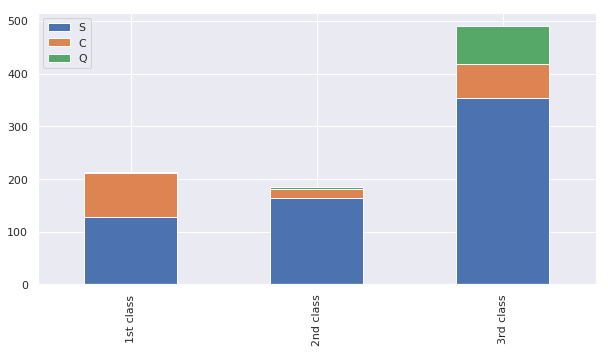

In [156]:
# Print who embarked from where and what class was

Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class','3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [157]:
# more than 50% embarked from S, so to correct data put S in missing values

freq_emb = train.Embarked.dropna().mode()[0]
freq_emb

'S'

In [158]:
# Print relation who survived and where embarked, and its possible to see that C > .5

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_emb)
    
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [159]:
# Converting categorical to numeric 

embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping).astype(int)
    
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,7.2500,0,1,0
1,1,1,1,3.0,71.2833,1,3,0
2,1,3,1,1.0,7.9250,0,2,1
3,1,1,1,2.0,53.1000,0,3,0
4,0,3,0,2.0,8.0500,0,1,1


In [160]:
# Fill missing fare with median

# train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

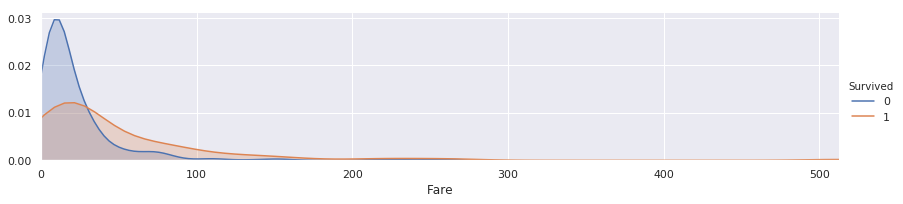

In [161]:
# This visualization is possible to see the ratio of the more expensive 
# the charge is the greater the high survival rate

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
#plt.xlim(0,50)
plt.show()

In [162]:
# Percentiles from dataset to convert to ordinal(interval) 

train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [163]:
# Converting to numeric

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train = train.drop(['FareBand'], axis=1)
combine = [train, test]

train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0,0,1,0
1,1,1,1,3.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1
5,0,3,0,2.0,1,2,1,1
6,0,1,0,3.0,3,0,1,1
7,0,3,0,0.0,2,0,4,0
8,1,3,1,2.0,1,0,3,0
9,1,2,1,0.0,2,1,3,0


In [164]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,0,2,1,1
1,893,3,1,3.0,0,0,3,0
2,894,2,0,3.0,1,2,1,1
3,895,3,0,2.0,1,0,1,1
4,896,3,1,1.0,1,0,3,0
5,897,3,0,0.0,1,0,1,1
6,898,3,1,2.0,0,2,2,1
7,899,2,0,1.0,2,0,1,0
8,900,3,1,1.0,0,1,3,1
9,901,3,0,1.0,2,0,1,0


## 6. Model and predict solution

In [165]:
# import lib machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [166]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


## Without a column (Age * Class)

((891, 7), (891,), (418, 7))

In [167]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.7

In [168]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.167562
5,Title,0.404621
4,Embarked,0.288039
6,IsAlone,0.249438
3,Fare,-0.010901
2,Age,-0.401938
0,Pclass,-1.120376


In [169]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5